In [1]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from analysis_dependencies import get_wrf_slp
from analysis_dependencies import get_wrf_rh
from analysis_dependencies import get_wrf_tk
from analysis_dependencies import get_wrf_th
from analysis_dependencies import get_wrf_ss
from analysis_dependencies import gen_wrf_proj
from analysis_dependencies import gen_cartopy_proj
from analysis_dependencies import get_uvmet
from analysis_dependencies import get_wrf_kinematic
#from analysis_dependencies import get_xsect
from analysis_dependencies import cross_section_plot
import datetime
import wrf
import cartopy
from cartopy import crs as ccrs
from cartopy import feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import xarray as xr

In [2]:
res='9km_res'
res_type='hires'
unpDir = '/home/bhoover/UWAOS/WRF_QOIP/data_repository/final_runs/Ida2021/R_mu/unperturbed/' + res + '/'
ptdDir = '/home/bhoover/UWAOS/WRF_QOIP/data_repository/final_runs/Ida2021/R_mu/negative/uvTq/upper_troposphere/ptdi13/' + res + '/'
arcDir = '/home/bhoover/UWAOS/WRF_QOIP/data_repository/case_archives/Ida2021/R_mu/negative/uvTq/upper_troposphere/'
arcPtd = '13'
dtInit = datetime.datetime(2021, 8, 28, 18)

In [3]:
fcstHr = 24
dtFcst = dtInit + datetime.timedelta(hours=fcstHr)
dtInitStr = datetime.datetime.strftime(dtInit,'%Y-%m-%d_%H:00:00')
dtFcstStr = datetime.datetime.strftime(dtFcst,'%Y-%m-%d_%H:00:00')
unpWRFInputFile = unpDir + 'wrfinput_d01_' + res_type
ptdWRFInputFile = ptdDir + 'wrfinput_d01_' + res_type
unpFileInit = unpDir + 'wrfout_d01_' + dtInitStr
ptdFileInit = ptdDir + 'wrfout_d01_' + dtInitStr
unpFileFcst = unpDir + 'wrfout_d01_' + dtFcstStr
ptdFileFcst = ptdDir + 'wrfout_d01_' + dtFcstStr
unpHdlInit = Dataset(unpFileInit)
ptdHdlInit = Dataset(ptdFileInit)
unpHdlFcst = Dataset(unpFileFcst)
ptdHdlFcst = Dataset(ptdFileFcst)

In [4]:
lat = np.asarray(unpHdlInit.variables['XLAT']).squeeze()
lon = np.asarray(unpHdlInit.variables['XLONG']).squeeze()
fix = np.where(lon < 0.)
lon[fix] = lon[fix] + 360.

datProj = gen_cartopy_proj(unpHdlInit,cenLat=unpHdlInit.MOAD_CEN_LAT,cenLon=unpHdlInit.STAND_LON)
plotProj = ccrs.PlateCarree()

unpSLPInit = np.asarray(get_wrf_slp(unpHdlInit)).squeeze()
ptdSLPInit = np.asarray(get_wrf_slp(ptdHdlInit)).squeeze()
unpSLPFcst = np.asarray(get_wrf_slp(unpHdlFcst)).squeeze()
ptdSLPFcst = np.asarray(get_wrf_slp(ptdHdlFcst)).squeeze()

unpRHInit = np.asarray(get_wrf_rh(unpHdlInit)).squeeze()
ptdRHInit = np.asarray(get_wrf_rh(ptdHdlInit)).squeeze()

unpHGTInit = np.asarray(wrf.getvar(unpHdlInit,'z')).squeeze()
ptdHGTInit = np.asarray(wrf.getvar(ptdHdlInit,'z')).squeeze()
unpHGTFcst = np.asarray(wrf.getvar(unpHdlFcst,'z')).squeeze()
ptdHGTFcst = np.asarray(wrf.getvar(ptdHdlFcst,'z')).squeeze()

unpTHTAInit = np.asarray(wrf.getvar(unpHdlInit,'theta')).squeeze()
ptdTHTAInit = np.asarray(wrf.getvar(ptdHdlInit,'theta')).squeeze()
unpTHTAFcst = np.asarray(wrf.getvar(unpHdlFcst,'theta')).squeeze()
ptdTHTAFcst = np.asarray(wrf.getvar(ptdHdlFcst,'theta')).squeeze()

unpPInit = np.asarray(wrf.getvar(unpHdlInit,'p')).squeeze()
ptdPInit = np.asarray(wrf.getvar(ptdHdlInit,'p')).squeeze()
unpPFcst = np.asarray(wrf.getvar(unpHdlFcst,'p')).squeeze()
ptdPFcst = np.asarray(wrf.getvar(ptdHdlFcst,'p')).squeeze()

plevs=np.arange(1000.,102000.,50.)

In [10]:
unpUWDInit, unpVWDInit = get_uvmet(unpHdlInit)
unpUWDFcst, unpVWDFcst = get_uvmet(unpHdlFcst)
ptdUWDInit, ptdVWDInit = get_uvmet(ptdHdlInit)
ptdUWDFcst, ptdVWDFcst = get_uvmet(ptdHdlFcst)

In [11]:
unpVORInit = get_wrf_kinematic(unpHdlInit,'vor')
unpVORFcst = get_wrf_kinematic(unpHdlFcst,'vor')
ptdVORInit = get_wrf_kinematic(ptdHdlInit,'vor')
ptdVORFcst = get_wrf_kinematic(ptdHdlFcst,'vor')

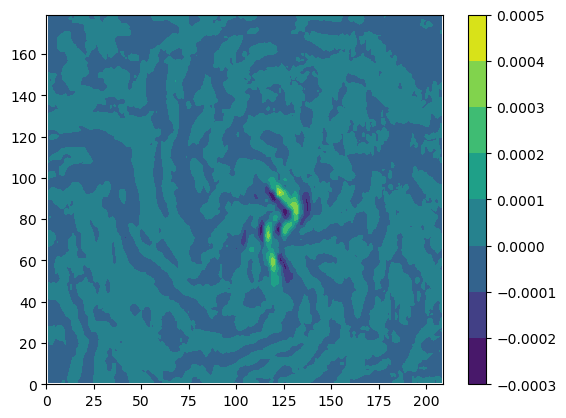

In [14]:
plt.contourf(ptdVORInit[54,:,:].squeeze()-unpVORInit[54,:,:].squeeze())
plt.colorbar()
plt.show()

In [21]:
unpUWDInit = np.asarray(unpHdlInit.variables['U']).squeeze()
unpVWDInit = np.asarray(unpHdlInit.variables['V']).squeeze()
unpUWDFcst = np.asarray(unpHdlFcst.variables['U']).squeeze()
unpVWDFcst = np.asarray(unpHdlFcst.variables['V']).squeeze()
ptdUWDInit = np.asarray(ptdHdlInit.variables['U']).squeeze()
ptdVWDInit = np.asarray(ptdHdlInit.variables['V']).squeeze()
ptdUWDFcst = np.asarray(ptdHdlFcst.variables['U']).squeeze()
ptdVWDFcst = np.asarray(ptdHdlFcst.variables['V']).squeeze()
# destagger to mass-points
unpUWDInit = wrf.destagger(unpUWDInit,stagger_dim=2)
unpVWDInit = wrf.destagger(unpVWDInit,stagger_dim=1)
unpUWDFcst = wrf.destagger(unpUWDFcst,stagger_dim=2)
unpVWDFcst = wrf.destagger(unpVWDFcst,stagger_dim=1)
ptdUWDInit = wrf.destagger(ptdUWDInit,stagger_dim=2)
ptdVWDInit = wrf.destagger(ptdVWDInit,stagger_dim=1)
ptdUWDFcst = wrf.destagger(ptdUWDFcst,stagger_dim=2)
ptdVWDFcst = wrf.destagger(ptdVWDFcst,stagger_dim=1)
# rotate to earth coordinates
rot = wrf.uvmet(unpUWDInit,unpVWDInit,lat,lon,cen_lon,cone) #............................... rotated (u,v) fields
unpUWDInit = rot[0,:,:,:] #................................................................. rotated u
unpVWDInit = rot[1,:,:,:] #................................................................. rotated v
rot = wrf.uvmet(unpUWDFcst,unpVWDFcst,lat,lon,cen_lon,cone) #............................... rotated (u,v) fields
unpUWDFcst = rot[0,:,:,:] #................................................................. rotated u
unpVWDFcst = rot[1,:,:,:] #................................................................. rotated v
rot = wrf.uvmet(ptdUWDInit,ptdVWDInit,lat,lon,cen_lon,cone) #............................... rotated (u,v) fields
ptdUWDInit = rot[0,:,:,:] #................................................................. rotated u
ptdVWDInit = rot[1,:,:,:] #................................................................. rotated v
rot = wrf.uvmet(ptdUWDFcst,ptdVWDFcst,lat,lon,cen_lon,cone) #............................... rotated (u,v) fields
ptdUWDFcst = rot[0,:,:,:] #................................................................. rotated u
ptdVWDFcst = rot[1,:,:,:] #................................................................. rotated v
# compute vorticity and divergence
unpVORInit = calc_vor(unpUWDInit,unpVWDInit,dx,dy) #........................................ perturbation vor [nlev,nlat,nlon]
unpDIVInit = calc_div(unpUWDInit,unpVWDInit,dx,dy) #........................................ perturbation div [nlev,nlat,nlon]
unpVORFcst = calc_vor(unpUWDFcst,unpVWDFcst,dx,dy) #........................................ perturbation vor [nlev,nlat,nlon]
unpDIVFcst = calc_div(unpUWDFcst,unpVWDFcst,dx,dy) #........................................ perturbation div [nlev,nlat,nlon]
ptdVORInit = calc_vor(ptdUWDInit,ptdVWDInit,dx,dy) #........................................ perturbation vor [nlev,nlat,nlon]
ptdDIVInit = calc_div(ptdUWDInit,ptdVWDInit,dx,dy) #........................................ perturbation div [nlev,nlat,nlon]
ptdVORFcst = calc_vor(ptdUWDFcst,ptdVWDFcst,dx,dy) #........................................ perturbation vor [nlev,nlat,nlon]
ptdDIVFcst = calc_div(ptdUWDFcst,ptdVWDFcst,dx,dy) #........................................ perturbation div [nlev,nlat,nlon]

In [35]:
unpUWDInit = unpHdlInit.variables['U']
unpVWDInit = unpHdlInit.variables['V']
# destagger to mass-points
unpUWDInit = wrf.destagger(unpUWDInit,stagger_dim=3)
unpVWDInit = wrf.destagger(unpVWDInit,stagger_dim=2)
# rotate to earth coordinates
rot = wrf.uvmet(unpUWDInit,unpVWDInit,lat,lon,cen_lon,cone) #............................... rotated (u,v) fields
unpUWDInit = rot[0,:,:,:,:] #................................................................. rotated u
unpVWDInit = rot[1,:,:,:,:] #................................................................. rotated v
# compute vorticity and divergence
unpVORInit = calc_vor(unpUWDInit,unpVWDInit,dx,dy) #........................................ perturbation vor [nlev,nlat,nlon]
unpDIVInit = calc_div(unpUWDInit,unpVWDInit,dx,dy) #........................................ perturbation div [nlev,nlat,nlon]

In [40]:
'vosr' in ['vor', 'div', 'str', 'shr']

False

In [22]:
# compute 850, 500, 150 potential temperature
pk = 85000.  # Pa
unpTHTA850Init = wrf.interplevel(field3d=unpTHTAInit,
                          vert=unpPInit,
                          desiredlev=pk,
                          missing=np.nan,
                          squeeze=True,
                          meta=False)
ptdTHTA850Init = wrf.interplevel(field3d=ptdTHTAInit,
                          vert=ptdPInit,
                          desiredlev=pk,
                          missing=np.nan,
                          squeeze=True,
                          meta=False)
unpTHTA850Fcst = wrf.interplevel(field3d=unpTHTAFcst,
                          vert=unpPInit,
                          desiredlev=pk,
                          missing=np.nan,
                          squeeze=True,
                          meta=False)
ptdTHTA850Fcst = wrf.interplevel(field3d=ptdTHTAFcst,
                          vert=ptdPInit,
                          desiredlev=pk,
                          missing=np.nan,
                          squeeze=True,
                          meta=False)
pk = 50000.  # Pa
unpTHTA500Init = wrf.interplevel(field3d=unpHGTInit,
                          vert=unpPInit,
                          desiredlev=pk,
                          missing=np.nan,
                          squeeze=True,
                          meta=False)
ptdTHTA500Init = wrf.interplevel(field3d=ptdHGTInit,
                          vert=ptdPInit,
                          desiredlev=pk,
                          missing=np.nan,
                          squeeze=True,
                          meta=False)
unpTHTA500Fcst = wrf.interplevel(field3d=unpHGTFcst,
                          vert=unpPInit,
                          desiredlev=pk,
                          missing=np.nan,
                          squeeze=True,
                          meta=False)
ptdTHTA500Fcst = wrf.interplevel(field3d=ptdHGTFcst,
                          vert=ptdPInit,
                          desiredlev=pk,
                          missing=np.nan,
                          squeeze=True,
                          meta=False)
pk = 15000.  # Pa
unpTHTA150Init = wrf.interplevel(field3d=unpHGTInit,
                          vert=unpPInit,
                          desiredlev=pk,
                          missing=np.nan,
                          squeeze=True,
                          meta=False)
ptdTHTA150Init = wrf.interplevel(field3d=ptdHGTInit,
                          vert=ptdPInit,
                          desiredlev=pk,
                          missing=np.nan,
                          squeeze=True,
                          meta=False)
unpTHTA150Fcst = wrf.interplevel(field3d=unpHGTFcst,
                          vert=unpPInit,
                          desiredlev=pk,
                          missing=np.nan,
                          squeeze=True,
                          meta=False)
ptdTHTA150Fcst = wrf.interplevel(field3d=ptdHGTFcst,
                          vert=ptdPInit,
                          desiredlev=pk,
                          missing=np.nan,
                          squeeze=True,
                          meta=False)

In [23]:
# compute 850, 500, 150 geopotential heights, 850-500 thicknesses
pk = 85000.  # Pa
unpVar1 = wrf.interplevel(field3d=unpHGTInit,
                          vert=unpPInit,
                          desiredlev=pk,
                          missing=np.nan,
                          squeeze=True,
                          meta=False)
ptdVar1 = wrf.interplevel(field3d=ptdHGTInit,
                          vert=ptdPInit,
                          desiredlev=pk,
                          missing=np.nan,
                          squeeze=True,
                          meta=False)
pk = 50000.  # Pa
unpVar2 = wrf.interplevel(field3d=unpHGTInit,
                          vert=unpPInit,
                          desiredlev=pk,
                          missing=np.nan,
                          squeeze=True,
                          meta=False)
ptdVar2 = wrf.interplevel(field3d=ptdHGTInit,
                          vert=ptdPInit,
                          desiredlev=pk,
                          missing=np.nan,
                          squeeze=True,
                          meta=False)
pk = 15000.  # Pa
unpVar3 = wrf.interplevel(field3d=unpHGTInit,
                          vert=unpPInit,
                          desiredlev=pk,
                          missing=np.nan,
                          squeeze=True,
                          meta=False)
ptdVar3 = wrf.interplevel(field3d=ptdHGTInit,
                          vert=ptdPInit,
                          desiredlev=pk,
                          missing=np.nan,
                          squeeze=True,
                          meta=False)
unpHGT850Init = unpVar1
unpHGT500Init = unpVar2
unpThk850_500Init = unpVar2 - unpVar1
ptdHGT850Init = ptdVar1
ptdHGT500Init = ptdVar2
ptdThk850_500Init = ptdVar2 - ptdVar1
unpHGT150Init = unpVar3
ptdHGT150Init = ptdVar3

pk = 85000.  # Pa
unpVar1 = wrf.interplevel(field3d=unpHGTFcst,
                          vert=unpPFcst,
                          desiredlev=pk,
                          missing=np.nan,
                          squeeze=True,
                          meta=False)
ptdVar1 = wrf.interplevel(field3d=ptdHGTFcst,
                          vert=ptdPFcst,
                          desiredlev=pk,
                          missing=np.nan,
                          squeeze=True,
                          meta=False)
pk = 50000.  # Pa
unpVar2 = wrf.interplevel(field3d=unpHGTFcst,
                          vert=unpPFcst,
                          desiredlev=pk,
                          missing=np.nan,
                          squeeze=True,
                          meta=False)
ptdVar2 = wrf.interplevel(field3d=ptdHGTFcst,
                          vert=ptdPFcst,
                          desiredlev=pk,
                          missing=np.nan,
                          squeeze=True,
                          meta=False)
pk = 15000.  # Pa
unpVar3 = wrf.interplevel(field3d=unpHGTFcst,
                          vert=unpPFcst,
                          desiredlev=pk,
                          missing=np.nan,
                          squeeze=True,
                          meta=False)
ptdVar3 = wrf.interplevel(field3d=ptdHGTFcst,
                          vert=ptdPFcst,
                          desiredlev=pk,
                          missing=np.nan,
                          squeeze=True,
                          meta=False)
unpHGT850Fcst = unpVar1
unpHGT500Fcst = unpVar2
unpThk850_500Fcst = unpVar2 - unpVar1
ptdHGT850Fcst = ptdVar1
ptdHGT500Fcst = ptdVar2
ptdThk850_500Fcst = ptdVar2 - ptdVar1
unpHGT150Fcst = unpVar3
ptdHGT150Fcst = ptdVar3

/home/bhoover/miniconda3/envs/UWAOS_WRF_QOIP/lib/python3.11/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


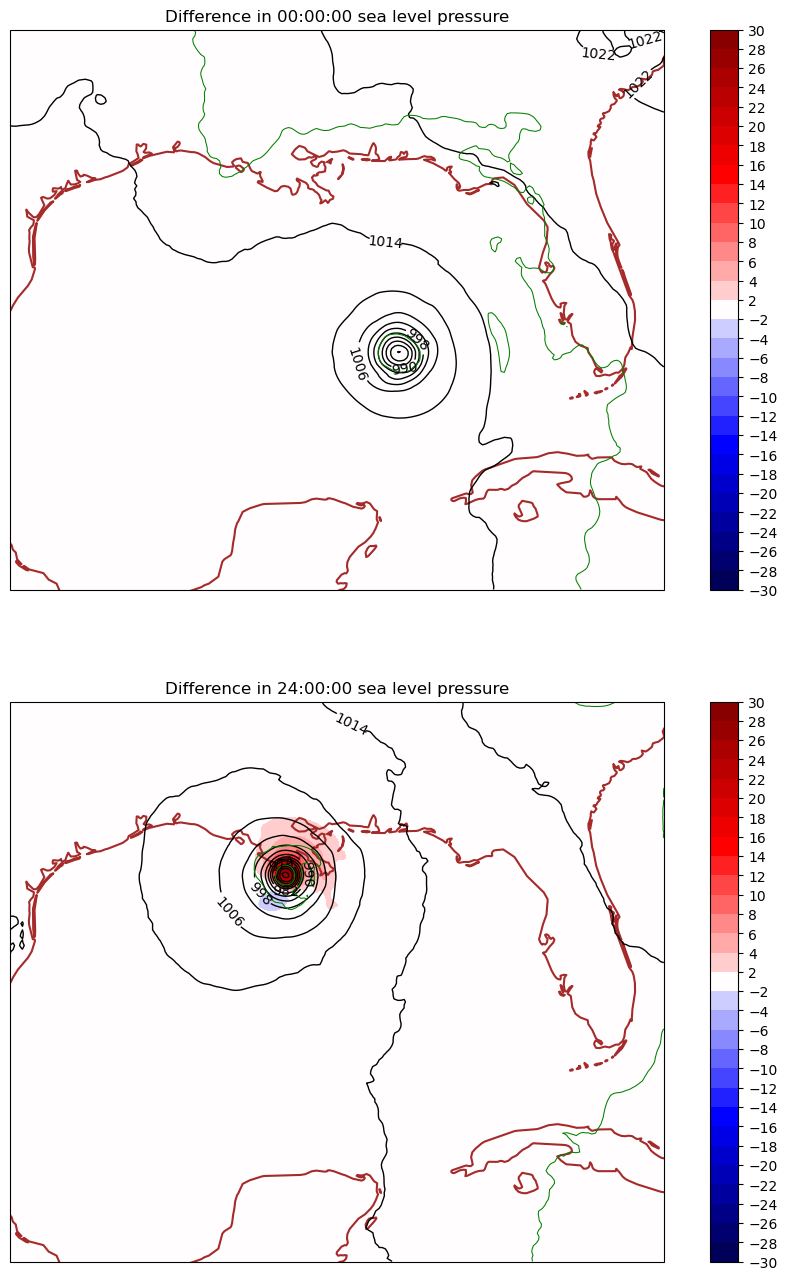

In [24]:
shdrng = np.arange(-30.,30.1,2.)
mask = np.ones((np.shape(shdrng)),dtype='bool')
mask[np.where(shdrng==0.)] = False
slprng = np.arange(950.,1050.1,4.)
thkrng = np.arange(3700.,4500.1,50.)
fig, (ax1, ax2) = plt.subplots(nrows=2, subplot_kw={'projection': datProj}, figsize=(12,16))

ax = ax1
shd=ax.contourf(lon,lat,ptdSLPInit-unpSLPInit,shdrng[mask],cmap='seismic',transform=plotProj)
slp=ax.contour(lon,lat,unpSLPInit,slprng,colors='black',linewidths=1.0,transform=plotProj)
ax.clabel(slp,levels=slprng[::2])
thk=ax.contour(lon,lat,unpThk850_500Init,thkrng,colors='green',linewidths=0.75,transform=plotProj)
ax.add_feature(cfeature.COASTLINE,color='brown',linewidth=1.5)
plt.colorbar(ax=ax,mappable=shd,ticks=shdrng[mask])
ax.set_title('Difference in 00:00:00 sea level pressure')

ax = ax2
shd=ax.contourf(lon,lat,ptdSLPFcst-unpSLPFcst,shdrng[mask],cmap='seismic',transform=plotProj)
slp=ax.contour(lon,lat,unpSLPFcst,slprng,colors='black',linewidths=1.0,transform=plotProj)
ax.clabel(slp,levels=slprng[::2])
thk=ax.contour(lon,lat,unpThk850_500Fcst,thkrng,colors='green',linewidths=0.75,transform=plotProj)
ax.add_feature(cfeature.COASTLINE,color='brown',linewidth=1.5)
plt.colorbar(ax=ax,mappable=shd,ticks=shdrng[mask])
ax.set_title('Difference in ' + str(fcstHr) + ':00:00 sea level pressure')

plt.show()

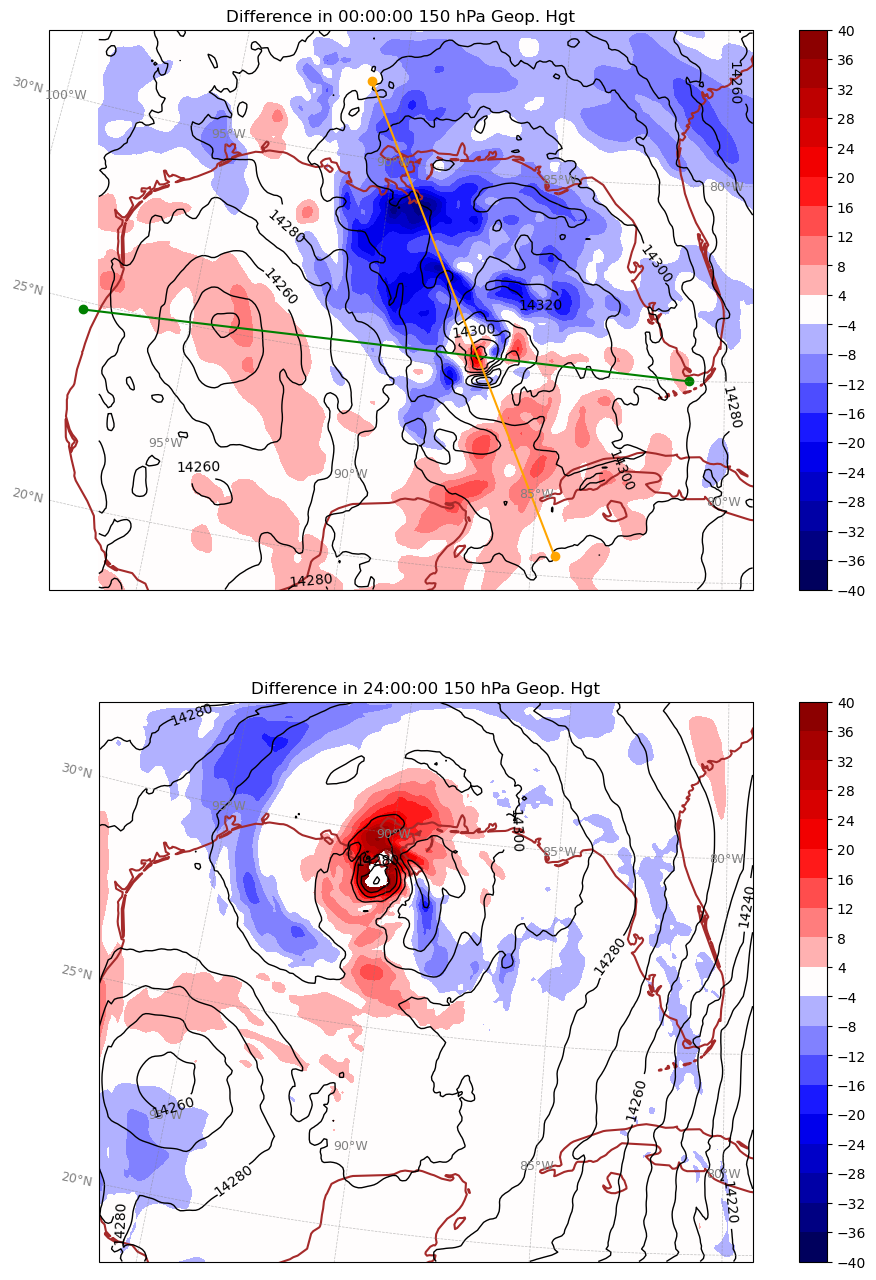

In [25]:
shdrng = np.arange(-40.,40.1,4.)
mask = np.ones((np.shape(shdrng)),dtype='bool')
mask[np.where(shdrng==0.)] = False
hgtrng = np.arange(14200.,14400.1,10.)

fig, (ax1, ax2) = plt.subplots(nrows=2, subplot_kw={'projection': datProj}, figsize=(12,16))

ax = ax1
shd=ax.contourf(lon,lat,ptdHGT150Init-unpHGT150Init,shdrng[mask],cmap='seismic',transform=plotProj)
hgt=ax.contour(lon,lat,unpHGT150Init,hgtrng,colors='black',linewidths=1.0,transform=plotProj)
ax.clabel(hgt,levels=hgtrng[::2])
ax.add_feature(cfeature.COASTLINE,color='brown',linewidth=1.5)
plt.colorbar(ax=ax,mappable=shd,ticks=shdrng[mask])
ax.set_title('Difference in 00:00:00 150 hPa Geop. Hgt')
# grid lines and cross-section settings
gl = ax.gridlines(crs=plotProj, draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.xlines = True
latLines = np.arange(20.,60.,5.)
lonLines = np.arange(-130.,-30.,5.)
gl.xlocator = mticker.FixedLocator(lonLines)
gl.ylocator = mticker.FixedLocator(latLines)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 9, 'color': 'gray'}
gl.ylabel_style = {'size': 9, 'color': 'gray'}
# define and plot cross-section
latBeg = 24.8
lonBeg = -98.
latEnd = 25.
lonEnd = -81.
ax.plot(lonBeg,latBeg,'o',transform=plotProj,color='green')
ax.plot(lonEnd,latEnd,'o',transform=plotProj,color='green')
ax.plot((lonBeg,lonEnd),(latBeg,latEnd),transform=plotProj,color='green')
latBeg = 32.
lonBeg = -91.
latEnd = 20.5
lonEnd = -84.4
ax.plot(lonBeg,latBeg,'o',transform=plotProj,color='orange')
ax.plot(lonEnd,latEnd,'o',transform=plotProj,color='orange')
ax.plot((lonBeg,lonEnd),(latBeg,latEnd),transform=plotProj,color='orange')
#latBeg = 30.
#lonBeg = -86.
#latEnd = 47.5
#lonEnd = -57.5
#ax.plot(lonBeg,latBeg,'o',transform=plotProj,color='magenta')
#ax.plot(lonEnd,latEnd,'o',transform=plotProj,color='magenta')
#ax.plot((lonBeg,lonEnd),(latBeg,latEnd),transform=plotProj,color='magenta')

ax = ax2
shd=ax.contourf(lon,lat,ptdHGT150Fcst-unpHGT150Fcst,shdrng[mask],cmap='seismic',transform=plotProj)
hgt=ax.contour(lon,lat,unpHGT150Fcst,hgtrng,colors='black',linewidths=1.0,transform=plotProj)
ax.clabel(hgt,levels=hgtrng[::2])
ax.add_feature(cfeature.COASTLINE,color='brown',linewidth=1.5)
plt.colorbar(ax=ax,mappable=shd,ticks=shdrng[mask])
ax.set_title('Difference in ' + str(fcstHr) + ':00:00 150 hPa Geop. Hgt')
# grid lines and cross-section settings
gl = ax.gridlines(crs=plotProj, draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.xlines = True
latLines = np.arange(20.,60.,5.)
lonLines = np.arange(-130.,-30.,5.)
gl.xlocator = mticker.FixedLocator(lonLines)
gl.ylocator = mticker.FixedLocator(latLines)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 9, 'color': 'gray'}
gl.ylabel_style = {'size': 9, 'color': 'gray'}
# define and plot cross-section
#latBeg = 30.
#lonBeg = -77.5
#latEnd = 52.
#lonEnd = -49.
#ax.plot(lonBeg,latBeg,'o',transform=plotProj,color='green')
#ax.plot(lonEnd,latEnd,'o',transform=plotProj,color='green')
#ax.plot((lonBeg,lonEnd),(latBeg,latEnd),transform=plotProj,color='green')
#latBeg = 45.
#lonBeg = -79.
#latEnd = 35.
#lonEnd = -55.
#ax.plot(lonBeg,latBeg,'o',transform=plotProj,color='orange')
#ax.plot(lonEnd,latEnd,'o',transform=plotProj,color='orange')
#ax.plot((lonBeg,lonEnd),(latBeg,latEnd),transform=plotProj,color='orange')

plt.show()

/home/bhoover/miniconda3/envs/UWAOS_WRF_QOIP/lib/python3.11/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


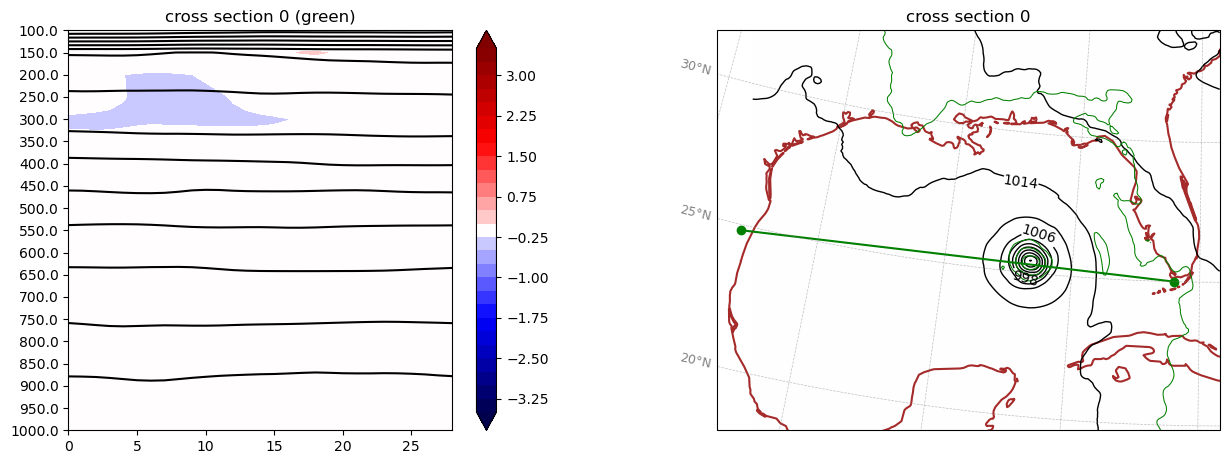

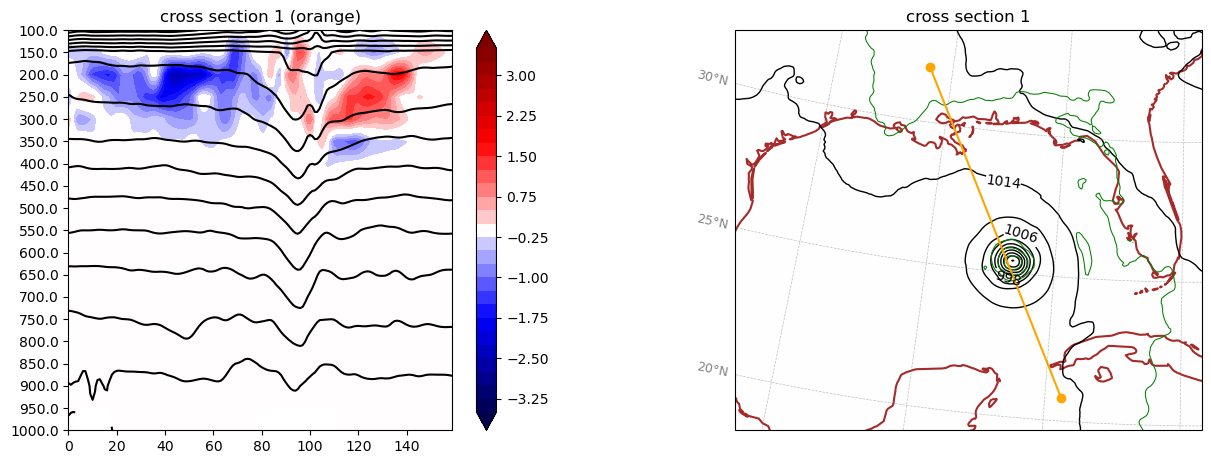

In [26]:
# cross-section using analysis_dependencies.cross_section_plot()
wrfHDL = unpHdlInit
latBegList = [ 24.8,  32.0]
lonBegList = [-98.0, -91.0]
latEndList = [ 25.0,  20.8]
lonEndList = [-81.0, -84.4]
xSectShadInterval = np.arange(-3.5, 3.51, 0.25)
xSectShadInterval = xSectShadInterval[np.where(xSectShadInterval != 0.)]
slpPertInterval = np.arange(-30., 30.1, 2.)
slpPertInterval = slpPertInterval[np.where(slpPertInterval != 0.)]
fig = cross_section_plot(wrfHDL=unpHdlInit,
                         latBegList=latBegList,
                         lonBegList=lonBegList,
                         latEndList=latEndList,
                         lonEndList=lonEndList,
                         xSectContVariable=wrf.getvar(unpHdlInit,'th'),
                         xSectContInterval=np.arange(250., 450.1, 6.),
                         xSectShadVariable=get_wrf_tk(ptdHdlInit)-get_wrf_tk(unpHdlInit),
                         xSectShadInterval=xSectShadInterval,
                         slp=get_wrf_slp(unpHdlInit),
                         slpInterval=np.arange(950., 1050.1, 4.),
                         thk=unpThk850_500Init,
                         thkInterval=np.arange(4300., 4500.1, 25.),
                         slpPert=get_wrf_slp(ptdHdlInit)-get_wrf_slp(unpHdlInit),
                         slpPertInterval=slpPertInterval,
                         datProj=datProj,
                         plotProj=plotProj,
                         presLevMin=10000.
                        )
plt.show(fig)

In [30]:
1.0E+05*np.nanmin(ptdVORInit-unpVORInit)

-51.63593756254223

In [31]:
wrfHDL = unpHdlInit
latBegList = [ 24.8,  32.0]
lonBegList = [-98.0, -91.0]
latEndList = [ 25.0,  20.8]
lonEndList = [-81.0, -84.4]
xSectShadInterval = np.arange(-70., 70.1, 3.5)
xSectShadInterval = xSectShadInterval[np.where(xSectShadInterval != 0.)]
slpPertInterval = np.arange(-30., 30.1, 2.)
slpPertInterval = slpPertInterval[np.where(slpPertInterval != 0.)]
fig = cross_section_plot(wrfHDL=unpHdlInit,
                         latBegList=latBegList,
                         lonBegList=lonBegList,
                         latEndList=latEndList,
                         lonEndList=lonEndList,
                         xSectContVariable=wrf.getvar(unpHdlInit,'th'),
                         xSectContInterval=np.arange(250., 450.1, 6.),
                         xSectShadVariable=1.0E+05 * (ptdVORInit-unpVORInit),
                         xSectShadInterval=xSectShadInterval,
                         slp=get_wrf_slp(unpHdlInit),
                         slpInterval=np.arange(950., 1050.1, 4.),
                         thk=unpThk850_500Init,
                         thkInterval=np.arange(4300., 4500.1, 25.),
                         slpPert=get_wrf_slp(ptdHdlInit)-get_wrf_slp(unpHdlInit),
                         slpPertInterval=slpPertInterval,
                         datProj=datProj,
                         plotProj=plotProj,
                         presLevMin=10000.
                        )
plt.show(fig)

AttributeError: 'numpy.ndarray' object has no attribute 'dims'

<Figure size 1200x1000 with 0 Axes>

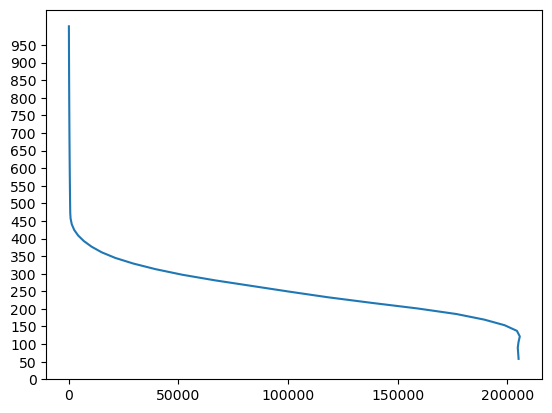

In [27]:
x=np.zeros((60,))
p=np.zeros((60,))
for i in range(60):
    x[i] = np.sum(np.abs(ptdHGTInit[i,:,:].squeeze() - unpHGTInit[i,:,:].squeeze()))
    p[i] = np.mean(unpPInit[i,:,:].squeeze())
plt.plot(x,0.01*p)
plt.yticks(ticks=np.arange(0.,1000.,50.))
plt.show()

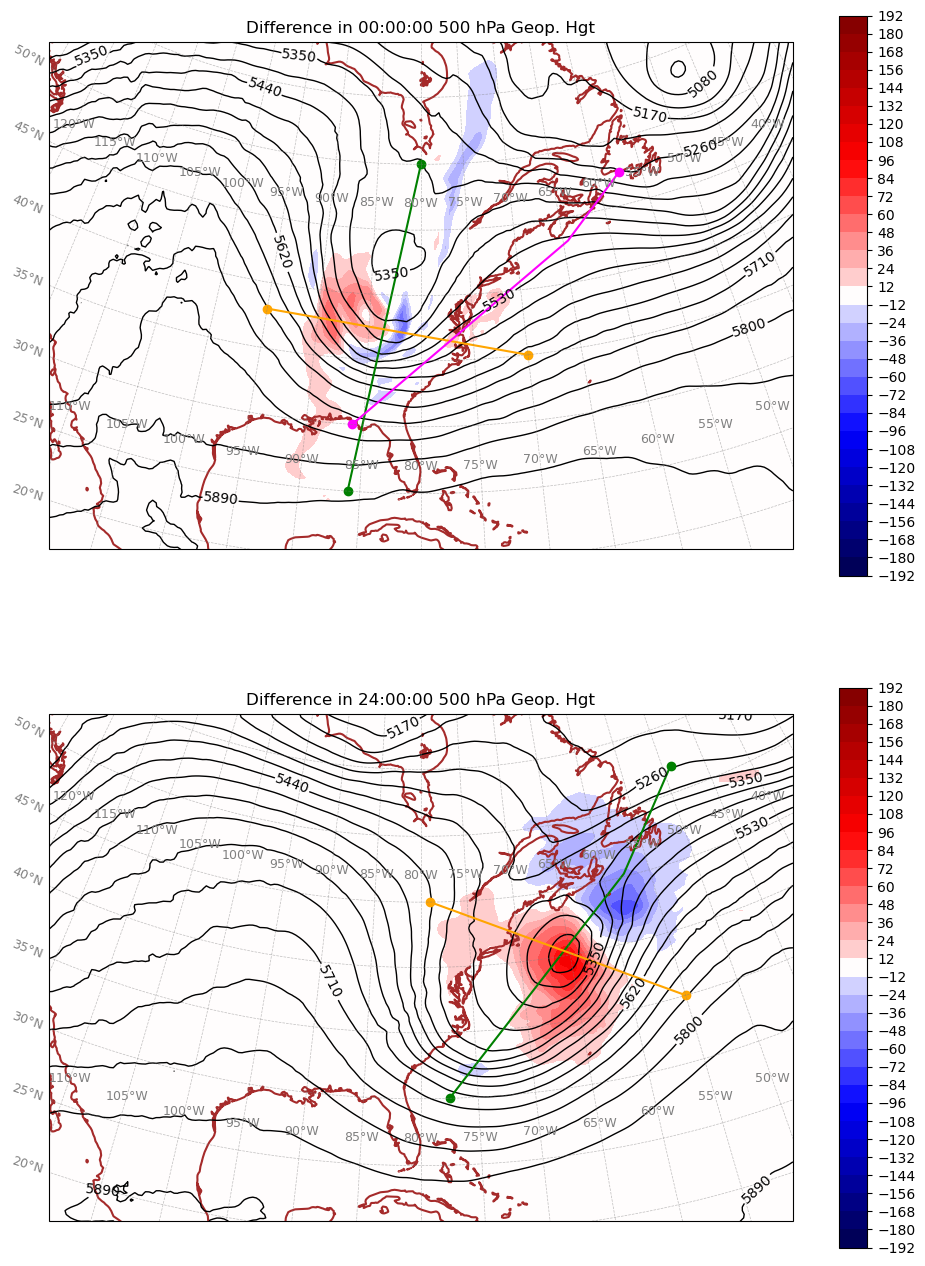

In [9]:
shdrng = np.arange(-192.,192.1,12.)
mask = np.ones((np.shape(shdrng)),dtype='bool')
mask[np.where(shdrng==0.)] = False
hgtrng = np.arange(4900.,6100.1,45.)

fig, (ax1, ax2) = plt.subplots(nrows=2, subplot_kw={'projection': datProj}, figsize=(12,16))

ax = ax1
shd=ax.contourf(lon,lat,ptdHGT500Init-unpHGT500Init,shdrng[mask],cmap='seismic',transform=plotProj)
hgt=ax.contour(lon,lat,unpHGT500Init,hgtrng,colors='black',linewidths=1.0,transform=plotProj)
ax.clabel(hgt,levels=hgtrng[::2])
ax.add_feature(cfeature.COASTLINE,color='brown',linewidth=1.5)
plt.colorbar(ax=ax,mappable=shd,ticks=shdrng[mask])
ax.set_title('Difference in 00:00:00 500 hPa Geop. Hgt')
# grid lines and cross-section settings
gl = ax.gridlines(crs=plotProj, draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.xlines = True
latLines = np.arange(20.,60.,5.)
lonLines = np.arange(-130.,-30.,5.)
gl.xlocator = mticker.FixedLocator(lonLines)
gl.ylocator = mticker.FixedLocator(latLines)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 9, 'color': 'gray'}
gl.ylabel_style = {'size': 9, 'color': 'gray'}
# define and plot cross-section
latBeg = 25.
lonBeg = -86.
latEnd = 50.
lonEnd = -80.
ax.plot(lonBeg,latBeg,'o',transform=plotProj,color='green')
ax.plot(lonEnd,latEnd,'o',transform=plotProj,color='green')
ax.plot((lonBeg,lonEnd),(latBeg,latEnd),transform=plotProj,color='green')
latBeg = 38.
lonBeg = -95.
latEnd = 35.
lonEnd = -70.
ax.plot(lonBeg,latBeg,'o',transform=plotProj,color='orange')
ax.plot(lonEnd,latEnd,'o',transform=plotProj,color='orange')
ax.plot((lonBeg,lonEnd),(latBeg,latEnd),transform=plotProj,color='orange')
latBeg = 30.
lonBeg = -86.
latEnd = 47.5
lonEnd = -57.5
ax.plot(lonBeg,latBeg,'o',transform=plotProj,color='magenta')
ax.plot(lonEnd,latEnd,'o',transform=plotProj,color='magenta')
ax.plot((lonBeg,lonEnd),(latBeg,latEnd),transform=plotProj,color='magenta')
ax = ax2
shd=ax.contourf(lon,lat,ptdHGT500Fcst-unpHGT500Fcst,shdrng[mask],cmap='seismic',transform=plotProj)
hgt=ax.contour(lon,lat,unpHGT500Fcst,hgtrng,colors='black',linewidths=1.0,transform=plotProj)
ax.clabel(hgt,levels=hgtrng[::2])
ax.add_feature(cfeature.COASTLINE,color='brown',linewidth=1.5)
plt.colorbar(ax=ax,mappable=shd,ticks=shdrng[mask])
ax.set_title('Difference in ' + str(fcstHr) + ':00:00 500 hPa Geop. Hgt')

# grid lines and cross-section settings
gl = ax.gridlines(crs=plotProj, draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.xlines = True
latLines = np.arange(20.,60.,5.)
lonLines = np.arange(-130.,-30.,5.)
gl.xlocator = mticker.FixedLocator(lonLines)
gl.ylocator = mticker.FixedLocator(latLines)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 9, 'color': 'gray'}
gl.ylabel_style = {'size': 9, 'color': 'gray'}
# define and plot cross-section
latBeg = 30.
lonBeg = -77.5
latEnd = 52.
lonEnd = -49.
ax.plot(lonBeg,latBeg,'o',transform=plotProj,color='green')
ax.plot(lonEnd,latEnd,'o',transform=plotProj,color='green')
ax.plot((lonBeg,lonEnd),(latBeg,latEnd),transform=plotProj,color='green')
latBeg = 45.
lonBeg = -79.
latEnd = 35.
lonEnd = -55.
ax.plot(lonBeg,latBeg,'o',transform=plotProj,color='orange')
ax.plot(lonEnd,latEnd,'o',transform=plotProj,color='orange')
ax.plot((lonBeg,lonEnd),(latBeg,latEnd),transform=plotProj,color='orange')
plt.show()

/home/bhoover/miniconda3/envs/UWAOS_WRF_QOIP/lib/python3.11/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


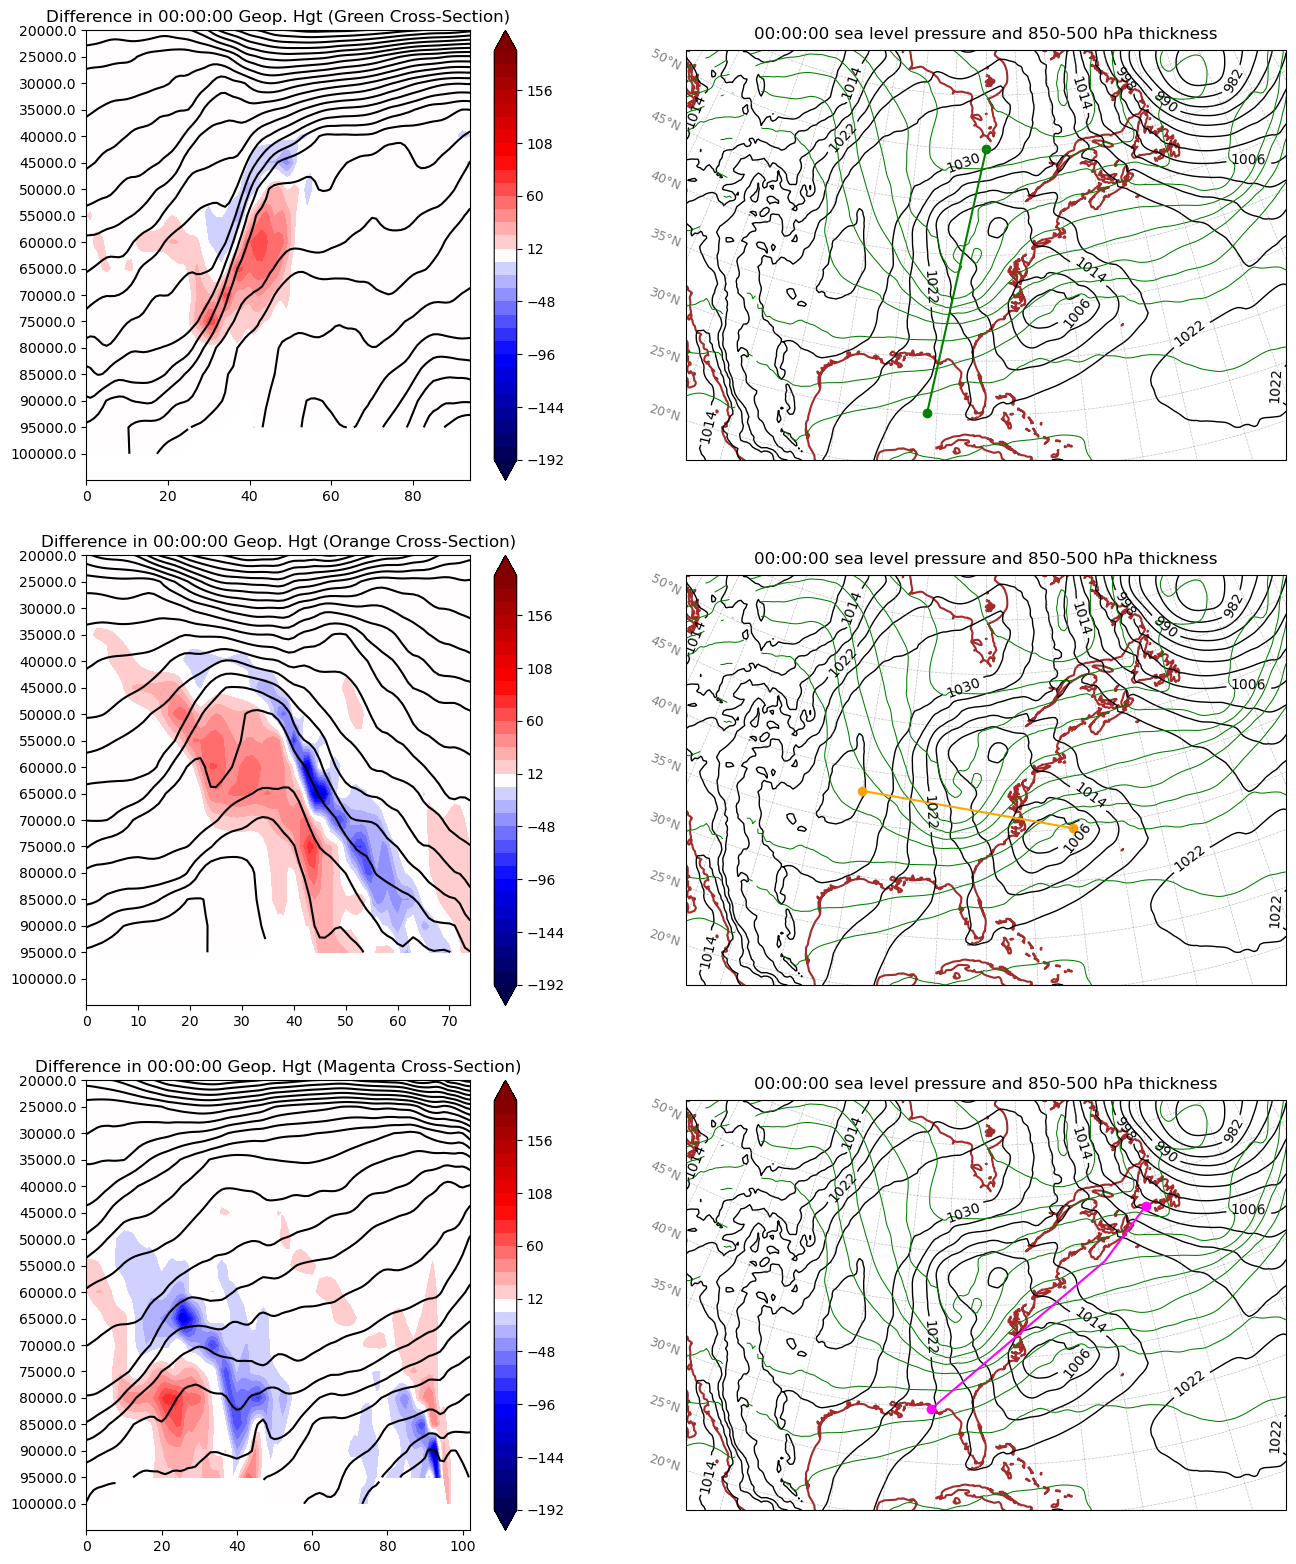

In [10]:
# sets of 2-panel plots with (left)  cross-section of initial geopotential height perturbations, and
#                            (right) cross-section line on SLP/thickness plot

# define plotting range of variables
conrng = np.arange(250., 450.1, 4.)              # cross-section contours (pot. temperature)
shdrng = np.arange(-192., 192.1, 12.)            # cr0ss-section shading (geop. hgt. perturbation)
mask = np.ones((np.shape(shdrng)), dtype='bool') # mask for shdrng (eliminates shading zero)
mask[np.where(shdrng==0.)] = False               #
slprng = np.arange(950., 1050.1, 4.)             # sea-level pressure contours
thkrng = np.arange(3700., 4500.1, 50.)           # 850-500 thickness contours

# define lat/lon lines for SLP/thickness plot
latLines = np.arange(20., 60., 5.)
lonLines = np.arange(-130., -30. ,5.)

# define figure for all panels
fig = plt.figure(figsize=(12,15))

# define cross-section and lat/lon values
latBeg = 25.
lonBeg = -86.
latEnd = 50.
lonEnd = -80.
unpxSect, latList, lonList = get_xsect(unpHdlInit, wrf.getvar(unpHdlInit,'z'), latBeg, lonBeg, latEnd, lonEnd)
ptdxSect = get_xsect(ptdHdlInit, wrf.getvar(ptdHdlInit,'z'), latBeg, lonBeg, latEnd, lonEnd)[0]
potxSect = get_xsect(unpHdlInit, wrf.getvar(unpHdlInit,'th'), latBeg, lonBeg, latEnd, lonEnd)[0]
# plot cross-section
ax = fig.add_axes(rect=[0.0, 0.7, 0.4, 0.3])
shd = ax.contourf(ptdxSect-unpxSect, levels=shdrng[mask], cmap='seismic', extend='both')
con = ax.contour(potxSect, levels=conrng, colors='black')
ax.set_yticks(ticks=np.arange(np.size(ptdxSect.coords['vertical'].values)), labels=ptdxSect.coords['vertical'].values)
ax.set_ylim(2, np.shape(potxSect)[0])
ax.invert_yaxis()
plt.colorbar(ax=ax, mappable=shd)
ax.set_title('Difference in 00:00:00 Geop. Hgt (Green Cross-Section)')
# plot SLP/thickness
ax = fig.add_axes(rect=[0.5, 0.7, 0.5, 0.3], projection=datProj)
slp = ax.contour(lon, lat, unpSLPInit, slprng, colors='black', linewidths=1.0, transform=plotProj)
ax.clabel(slp, levels=slprng[::2])
thk = ax.contour(lon, lat, unpThk850_500Init, thkrng, colors='green', linewidths=0.75, transform=plotProj)
ax.add_feature(cfeature.COASTLINE, color='brown', linewidth=1.5)
ax.set_title('00:00:00 sea level pressure and 850-500 hPa thickness')
# add gridlines
gl = ax.gridlines(crs=plotProj, draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(lonLines)
gl.ylocator = mticker.FixedLocator(latLines)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'alpha' : 0.}
gl.ylabel_style = {'size' : 9, 'color' : 'gray'}
# plot cross-section line
ax.plot(lonBeg, latBeg, 'o', transform=plotProj, color='green')
ax.plot(lonEnd, latEnd, 'o', transform=plotProj, color='green')
ax.plot((lonBeg, lonEnd), (latBeg, latEnd), transform=plotProj, color='green')


# define cross-section and lat/lon values
latBeg = 38.
lonBeg = -95.
latEnd = 35.
lonEnd = -70.
unpxSect, latList, lonList = get_xsect(unpHdlInit, wrf.getvar(unpHdlInit,'z'), latBeg, lonBeg, latEnd, lonEnd)
ptdxSect = get_xsect(ptdHdlInit, wrf.getvar(ptdHdlInit,'z'), latBeg, lonBeg, latEnd, lonEnd)[0]
potxSect = get_xsect(unpHdlInit, wrf.getvar(unpHdlInit,'th'), latBeg, lonBeg, latEnd, lonEnd)[0]
# plot cross-section
ax = fig.add_axes(rect=[0.0, 0.35, 0.4, 0.3])
shd = ax.contourf(ptdxSect-unpxSect, levels=shdrng[mask], cmap='seismic', extend='both')
con = ax.contour(potxSect, levels=conrng, colors='black')
ax.set_yticks(ticks=np.arange(np.size(ptdxSect.coords['vertical'].values)), labels=ptdxSect.coords['vertical'].values)
ax.set_ylim(2, np.shape(potxSect)[0])
ax.invert_yaxis()
plt.colorbar(ax=ax, mappable=shd)
ax.set_title('Difference in 00:00:00 Geop. Hgt (Orange Cross-Section)')
# plot SLP/thickness
ax = fig.add_axes(rect=[0.5, 0.35, 0.5, 0.3], projection=datProj)
slp = ax.contour(lon, lat, unpSLPInit, slprng, colors='black', linewidths=1.0, transform=plotProj)
ax.clabel(slp, levels=slprng[::2])
thk = ax.contour(lon, lat, unpThk850_500Init, thkrng, colors='green', linewidths=0.75, transform=plotProj)
ax.add_feature(cfeature.COASTLINE, color='brown', linewidth=1.5)
ax.set_title('00:00:00 sea level pressure and 850-500 hPa thickness')
# add gridlines
gl = ax.gridlines(crs=plotProj, draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(lonLines)
gl.ylocator = mticker.FixedLocator(latLines)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'alpha' : 0.}
gl.ylabel_style = {'size' : 9, 'color' : 'gray'}
# plot cross-section line
ax.plot(lonBeg, latBeg, 'o', transform=plotProj, color='orange')
ax.plot(lonEnd, latEnd, 'o', transform=plotProj, color='orange')
ax.plot((lonBeg, lonEnd), (latBeg, latEnd), transform=plotProj, color='orange')


# define cross-section and lat/lon values
latBeg = 30.
lonBeg = -86.
latEnd = 47.5
lonEnd = -57.5
unpxSect, latList, lonList = get_xsect(unpHdlInit, wrf.getvar(unpHdlInit,'z'), latBeg, lonBeg, latEnd, lonEnd)
ptdxSect = get_xsect(ptdHdlInit, wrf.getvar(ptdHdlInit,'z'), latBeg, lonBeg, latEnd, lonEnd)[0]
potxSect = get_xsect(unpHdlInit, wrf.getvar(unpHdlInit,'th'), latBeg, lonBeg, latEnd, lonEnd)[0]
# plot cross-section
ax = fig.add_axes(rect=[0.0, 0.0, 0.4, 0.3])
shd = ax.contourf(ptdxSect-unpxSect, levels=shdrng[mask], cmap='seismic', extend='both')
con = ax.contour(potxSect, levels=conrng, colors='black')
ax.set_yticks(ticks=np.arange(np.size(ptdxSect.coords['vertical'].values)), labels=ptdxSect.coords['vertical'].values)
ax.set_ylim(2, np.shape(potxSect)[0])
ax.invert_yaxis()
plt.colorbar(ax=ax, mappable=shd)
ax.set_title('Difference in 00:00:00 Geop. Hgt (Magenta Cross-Section)')
# plot SLP/thickness
ax = fig.add_axes(rect=[0.5, 0.0, 0.5, 0.3], projection=datProj)
slp=ax.contour(lon, lat, unpSLPInit, slprng, colors='black', linewidths=1.0, transform=plotProj)
ax.clabel(slp, levels=slprng[::2])
thk=ax.contour(lon, lat, unpThk850_500Init, thkrng, colors='green', linewidths=0.75, transform=plotProj)
ax.add_feature(cfeature.COASTLINE, color='brown', linewidth=1.5)
ax.set_title('00:00:00 sea level pressure and 850-500 hPa thickness')
# add gridlines
gl = ax.gridlines(crs=plotProj, draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(lonLines)
gl.ylocator = mticker.FixedLocator(latLines)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'alpha' : 0.}
gl.ylabel_style = {'size' : 9, 'color' : 'gray'}
# plot cross-section line
ax.plot(lonBeg, latBeg, 'o', transform=plotProj, color='magenta')
ax.plot(lonEnd, latEnd, 'o', transform=plotProj, color='magenta')
ax.plot((lonBeg, lonEnd), (latBeg, latEnd), transform=plotProj, color='magenta')
plt.show()

/home/bhoover/miniconda3/envs/UWAOS_WRF_QOIP/lib/python3.11/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


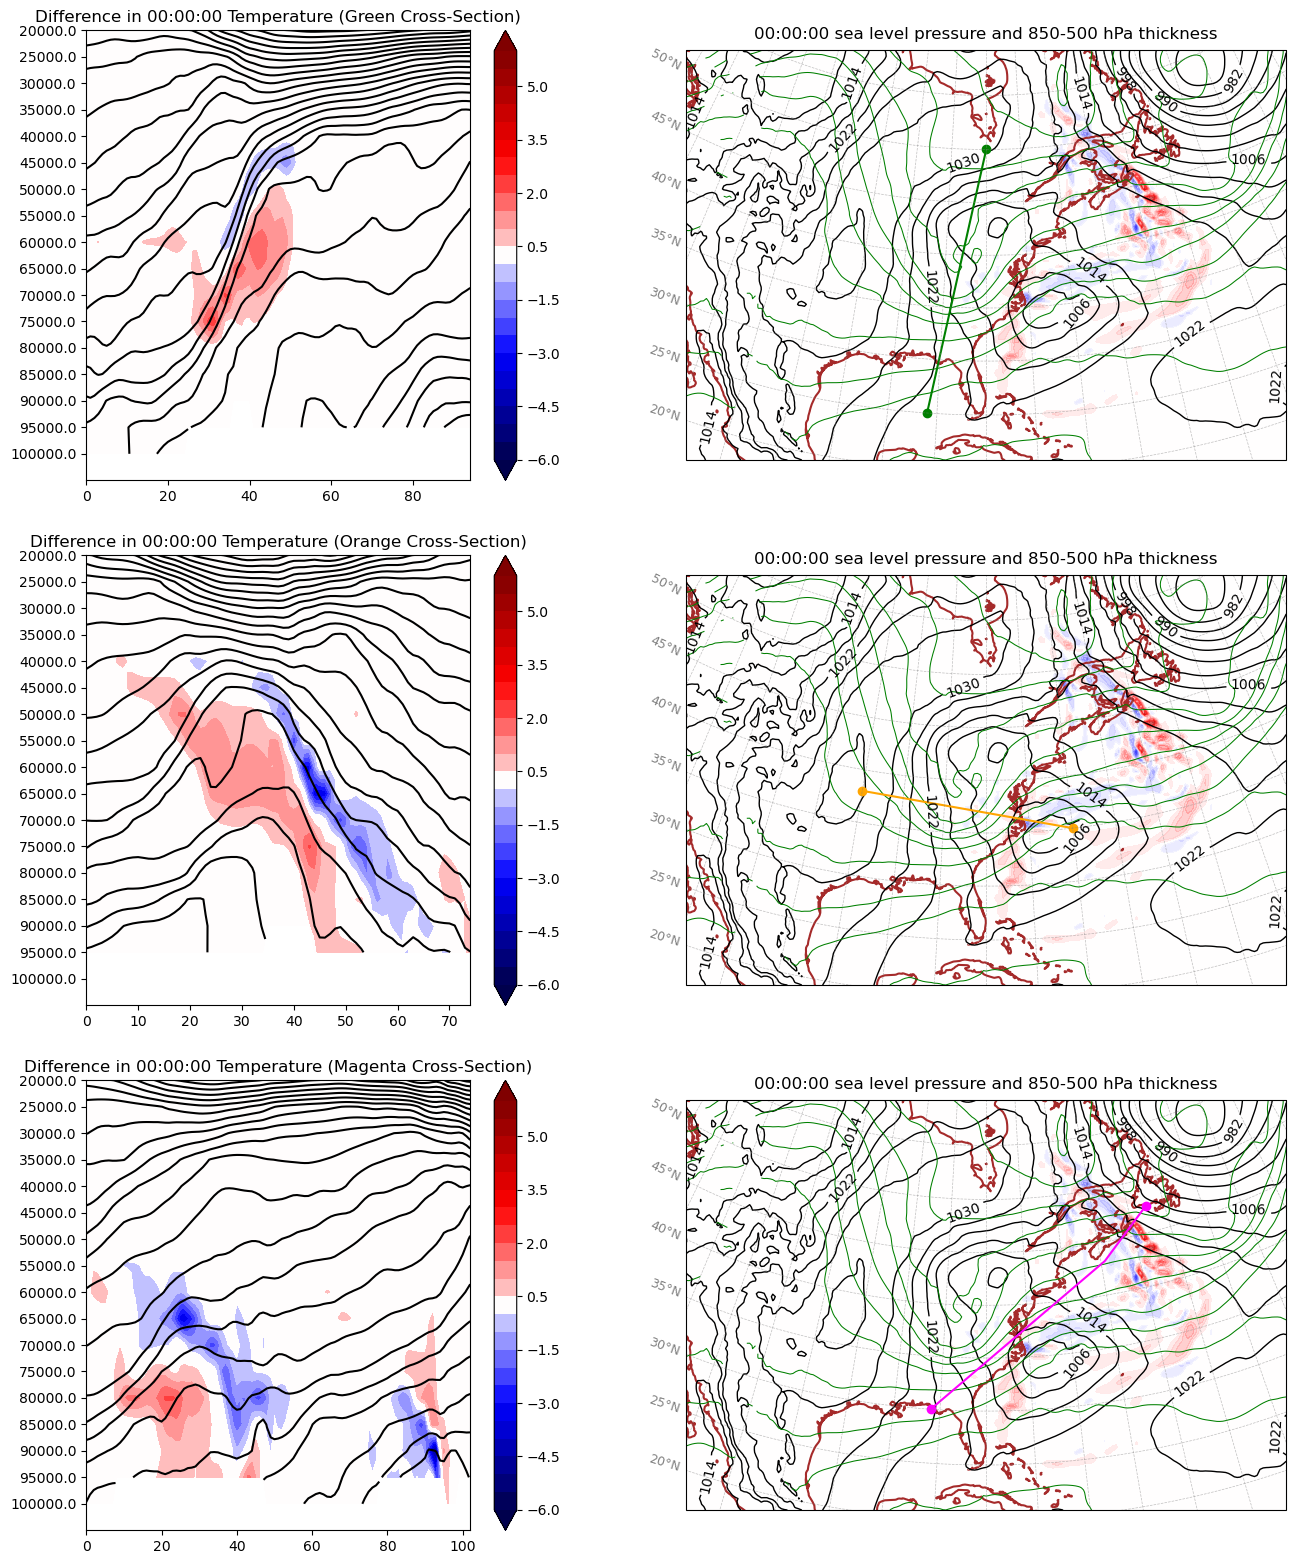

In [11]:
# sets of 2-panel plots with (left)  cross-section of initial potential temperature perturbations, and
#                            (right) cross-section line on SLP/thickness plot

# define plotting range of variables
conrng = np.arange(250., 450.1, 4.)              # cross-section contours (pot. temperature)
shdrng = np.arange(-6., 6.1, 0.5)                # cross-section shading (temperature  perturbation)
mask = np.ones((np.shape(shdrng)), dtype='bool') # mask for shdrng (eliminates shading zero)
mask[np.where(shdrng==0.)] = False               #
prtrng = np.arange(-30.,30.1,2.)                 # perturbation sea-level pressure contours
pmask = np.ones((np.shape(prtrng)), dtype='bool')# mask for prtrng (eliminates shading zero)
pmask[np.where(prtrng==0.)] = False              #
slprng = np.arange(950., 1050.1, 4.)             # sea-level pressure contours
thkrng = np.arange(3700., 4500.1, 50.)           # 850-500 thickness contours

# define lat/lon lines for SLP/thickness plot
latLines = np.arange(20., 60., 5.)
lonLines = np.arange(-130., -30. ,5.)

# define figure for all panels
fig = plt.figure(figsize=(12,15))

# define cross-section and lat/lon values
latBeg = 25.
lonBeg = -86.
latEnd = 50.
lonEnd = -80.
unpxSect, latList, lonList = get_xsect(unpHdlInit, get_wrf_tk(unpHdlInit), latBeg, lonBeg, latEnd, lonEnd)
ptdxSect = get_xsect(ptdHdlInit, get_wrf_tk(ptdHdlInit), latBeg, lonBeg, latEnd, lonEnd)[0]
potxSect = get_xsect(unpHdlInit, wrf.getvar(unpHdlInit,'th'), latBeg, lonBeg, latEnd, lonEnd)[0]
# plot cross-section
ax = fig.add_axes(rect=[0.0, 0.7, 0.4, 0.3])
shd = ax.contourf(ptdxSect-unpxSect, levels=shdrng[mask], cmap='seismic', extend='both')
con = ax.contour(potxSect, levels=conrng, colors='black')
ax.set_yticks(ticks=np.arange(np.size(ptdxSect.coords['vertical'].values)), labels=ptdxSect.coords['vertical'].values)
ax.set_ylim(2, np.shape(potxSect)[0])
ax.invert_yaxis()
plt.colorbar(ax=ax, mappable=shd)
ax.set_title('Difference in 00:00:00 Temperature (Green Cross-Section)')
# plot SLP/thickness
ax = fig.add_axes(rect=[0.5, 0.7, 0.5, 0.3], projection=datProj)
prt = ax.contourf(lon, lat, ptdSLPInit-unpSLPInit, prtrng[pmask], cmap='seismic', extend='both', alpha=0.4, transform=plotProj)
slp = ax.contour(lon, lat, unpSLPInit, slprng, colors='black', linewidths=1.0, transform=plotProj)
ax.clabel(slp, levels=slprng[::2])
thk = ax.contour(lon, lat, unpThk850_500Init, thkrng, colors='green', linewidths=0.75, transform=plotProj)
ax.add_feature(cfeature.COASTLINE, color='brown', linewidth=1.5)
ax.set_title('00:00:00 sea level pressure and 850-500 hPa thickness')
# add gridlines
gl = ax.gridlines(crs=plotProj, draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(lonLines)
gl.ylocator = mticker.FixedLocator(latLines)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'alpha' : 0.}
gl.ylabel_style = {'size' : 9, 'color' : 'gray'}
# plot cross-section line
ax.plot(lonBeg, latBeg, 'o', transform=plotProj, color='green')
ax.plot(lonEnd, latEnd, 'o', transform=plotProj, color='green')
ax.plot((lonBeg, lonEnd), (latBeg, latEnd), transform=plotProj, color='green')


# define cross-section and lat/lon values
latBeg = 38.
lonBeg = -95.
latEnd = 35.
lonEnd = -70.
unpxSect, latList, lonList = get_xsect(unpHdlInit, get_wrf_tk(unpHdlInit), latBeg, lonBeg, latEnd, lonEnd)
ptdxSect = get_xsect(ptdHdlInit, get_wrf_tk(ptdHdlInit), latBeg, lonBeg, latEnd, lonEnd)[0]
potxSect = get_xsect(unpHdlInit, wrf.getvar(unpHdlInit,'th'), latBeg, lonBeg, latEnd, lonEnd)[0]
# plot cross-section
ax = fig.add_axes(rect=[0.0, 0.35, 0.4, 0.3])
shd = ax.contourf(ptdxSect-unpxSect, levels=shdrng[mask], cmap='seismic', extend='both')
con = ax.contour(potxSect, levels=conrng, colors='black')
ax.set_yticks(ticks=np.arange(np.size(ptdxSect.coords['vertical'].values)), labels=ptdxSect.coords['vertical'].values)
ax.set_ylim(2, np.shape(potxSect)[0])
ax.invert_yaxis()
plt.colorbar(ax=ax, mappable=shd)
ax.set_title('Difference in 00:00:00 Temperature (Orange Cross-Section)')
# plot SLP/thickness
ax = fig.add_axes(rect=[0.5, 0.35, 0.5, 0.3], projection=datProj)
prt = ax.contourf(lon, lat, ptdSLPInit-unpSLPInit, prtrng[pmask], cmap='seismic', extend='both', alpha=0.4, transform=plotProj)
slp = ax.contour(lon, lat, unpSLPInit, slprng, colors='black', linewidths=1.0, transform=plotProj)
ax.clabel(slp, levels=slprng[::2])
thk = ax.contour(lon, lat, unpThk850_500Init, thkrng, colors='green', linewidths=0.75, transform=plotProj)
ax.add_feature(cfeature.COASTLINE, color='brown', linewidth=1.5)
ax.set_title('00:00:00 sea level pressure and 850-500 hPa thickness')
# add gridlines
gl = ax.gridlines(crs=plotProj, draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(lonLines)
gl.ylocator = mticker.FixedLocator(latLines)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'alpha' : 0.}
gl.ylabel_style = {'size' : 9, 'color' : 'gray'}
# plot cross-section line
ax.plot(lonBeg, latBeg, 'o', transform=plotProj, color='orange')
ax.plot(lonEnd, latEnd, 'o', transform=plotProj, color='orange')
ax.plot((lonBeg, lonEnd), (latBeg, latEnd), transform=plotProj, color='orange')


# define cross-section and lat/lon values
latBeg = 30.
lonBeg = -86.
latEnd = 47.5
lonEnd = -57.5
unpxSect, latList, lonList = get_xsect(unpHdlInit, get_wrf_tk(unpHdlInit), latBeg, lonBeg, latEnd, lonEnd)
ptdxSect = get_xsect(ptdHdlInit, get_wrf_tk(ptdHdlInit), latBeg, lonBeg, latEnd, lonEnd)[0]
potxSect = get_xsect(unpHdlInit, wrf.getvar(unpHdlInit,'th'), latBeg, lonBeg, latEnd, lonEnd)[0]
# plot cross-section
ax = fig.add_axes(rect=[0.0, 0.0, 0.4, 0.3])
shd = ax.contourf(ptdxSect-unpxSect, levels=shdrng[mask], cmap='seismic', extend='both')
con = ax.contour(potxSect, levels=conrng, colors='black')
ax.set_yticks(ticks=np.arange(np.size(ptdxSect.coords['vertical'].values)), labels=ptdxSect.coords['vertical'].values)
ax.set_ylim(2, np.shape(potxSect)[0])
ax.invert_yaxis()
plt.colorbar(ax=ax, mappable=shd)
ax.set_title('Difference in 00:00:00 Temperature (Magenta Cross-Section)')
# plot SLP/thickness
ax = fig.add_axes(rect=[0.5, 0.0, 0.5, 0.3], projection=datProj)
prt = ax.contourf(lon, lat, ptdSLPInit-unpSLPInit, prtrng[pmask], cmap='seismic', extend='both', alpha=0.4, transform=plotProj)
slp=ax.contour(lon, lat, unpSLPInit, slprng, colors='black', linewidths=1.0, transform=plotProj)
ax.clabel(slp, levels=slprng[::2])
thk=ax.contour(lon, lat, unpThk850_500Init, thkrng, colors='green', linewidths=0.75, transform=plotProj)
ax.add_feature(cfeature.COASTLINE, color='brown', linewidth=1.5)
ax.set_title('00:00:00 sea level pressure and 850-500 hPa thickness')
# add gridlines
gl = ax.gridlines(crs=plotProj, draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(lonLines)
gl.ylocator = mticker.FixedLocator(latLines)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'alpha' : 0.}
gl.ylabel_style = {'size' : 9, 'color' : 'gray'}
# plot cross-section line
ax.plot(lonBeg, latBeg, 'o', transform=plotProj, color='magenta')
ax.plot(lonEnd, latEnd, 'o', transform=plotProj, color='magenta')
ax.plot((lonBeg, lonEnd), (latBeg, latEnd), transform=plotProj, color='magenta')
plt.show()

In [12]:
unpS = get_wrf_ss(unpHdlInit)
ptdS = get_wrf_ss(ptdHdlInit)

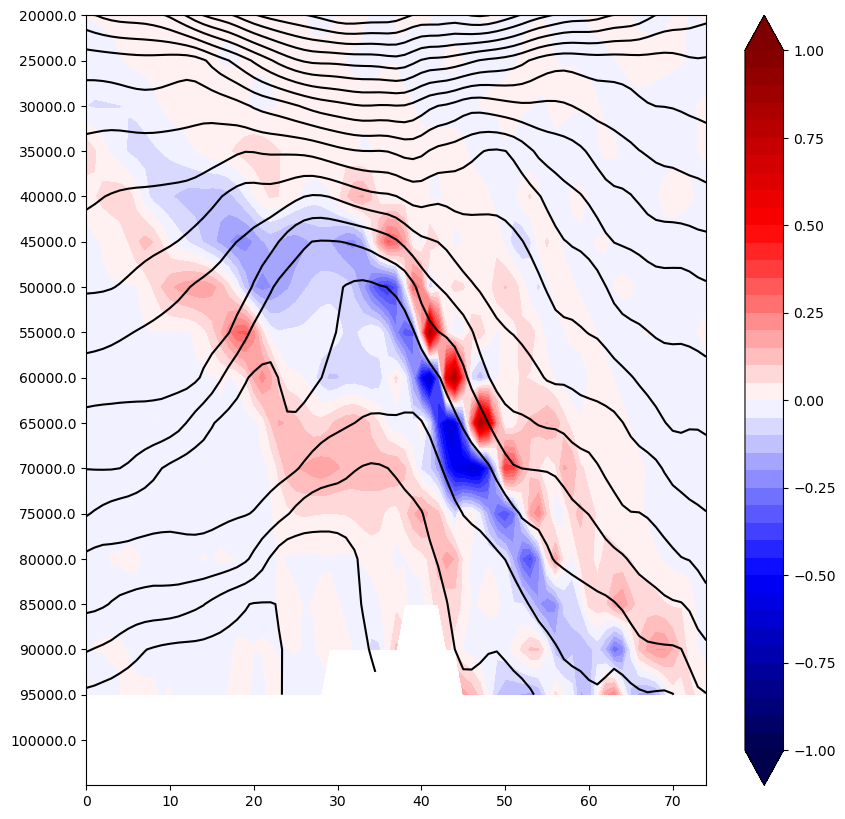

In [13]:
latBeg = 38.
lonBeg = -95.
latEnd = 35.
lonEnd = -70.

unpxSect, latList, lonList = get_xsect(unpHdlInit, unpS, latBeg, lonBeg, latEnd, lonEnd)
ptdxSect = get_xsect(ptdHdlInit, ptdS, latBeg, lonBeg, latEnd, lonEnd)[0]
conxSect = get_xsect(unpHdlInit, wrf.getvar(unpHdlInit,'th'), latBeg, lonBeg, latEnd, lonEnd)[0]

conrng = np.arange(250., 450.1, 4.)              # cross-section contours (pot. temperature)
shdrng = np.arange(-1., 1.01, 0.05)              # cr0ss-section shading (stat. stab. perturbation)
mask = np.ones((np.shape(shdrng)), dtype='bool') # mask for shdrng (eliminates shading zero)
mask[np.where(shdrng==0.)] = False               #

fig,ax=plt.subplots(ncols=1,nrows=1,figsize=(10,10))
shd=ax.contourf(1.0E+03*np.asarray(ptdxSect-unpxSect),levels=shdrng,cmap='seismic', extend='both')
con = ax.contour(conxSect, levels=conrng, colors='black')
plt.colorbar(ax=ax,mappable=shd)
ax.set_yticks(ticks=np.arange(np.size(ptdxSect.coords['vertical'].values)), labels=ptdxSect.coords['vertical'].values)
ax.set_ylim(2, np.shape(potxSect)[0])
ax.invert_yaxis()
plt.show()

/home/bhoover/miniconda3/envs/UWAOS_WRF_QOIP/lib/python3.11/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


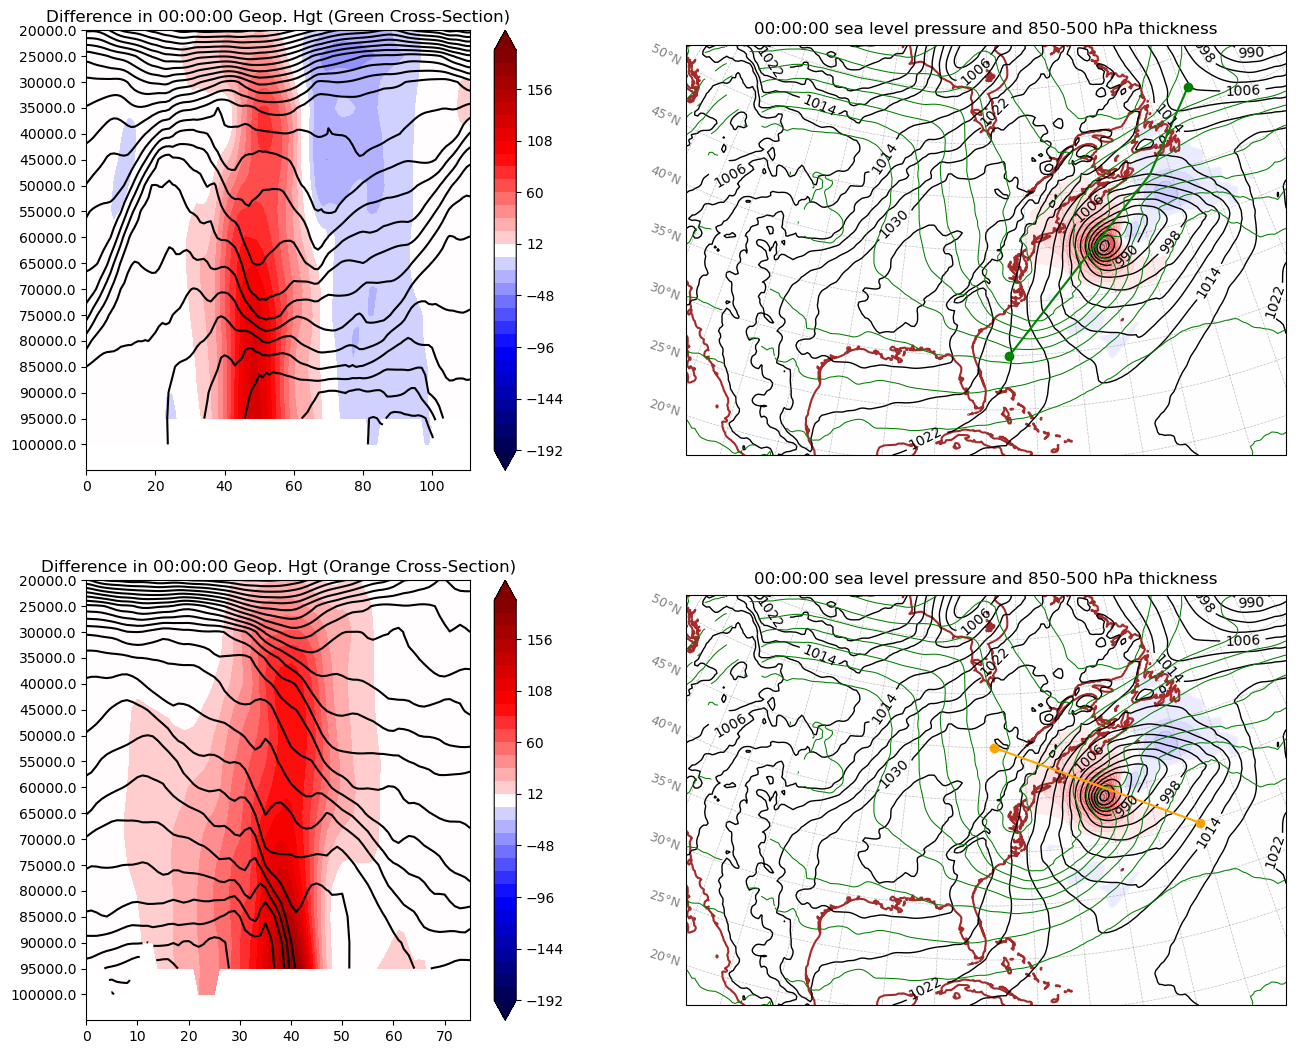

In [14]:
# sets of 2-panel plots with (left)  cross-section of final geopotential height perturbations, and
#                            (right) cross-section line on SLP/thickness plot

# define plotting range of variables
conrng = np.arange(250., 450.1, 4.)              # cross-section contours (pot. temperature)
shdrng = np.arange(-192., 192.1, 12.)            # cross-section shading (geop. hgt. perturbation)
mask = np.ones((np.shape(shdrng)), dtype='bool') # mask for shdrng (eliminates shading zero)
mask[np.where(shdrng==0.)] = False               #
slprng = np.arange(950., 1050.1, 4.)             # sea-level pressure contours
prtrng = np.arange(-30.,30.1,2.)                 # perturbation sea-level pressure contours
pmask = np.ones((np.shape(prtrng)), dtype='bool')# mask for prtrng (eliminates shading zero)
pmask[np.where(prtrng==0.)] = False              #
thkrng = np.arange(3700., 4500.1, 50.)           # 850-500 thickness contours

# define lat/lon lines for SLP/thickness plot
latLines = np.arange(20., 60., 5.)
lonLines = np.arange(-130., -30. ,5.)

# define figure for all panels
fig = plt.figure(figsize=(12,11))

# define cross-section and lat/lon values
latBeg = 30.
lonBeg = -77.5
latEnd = 52.
lonEnd = -49.
unpxSect, latList, lonList = get_xsect(unpHdlFcst, wrf.getvar(unpHdlFcst,'z'), latBeg, lonBeg, latEnd, lonEnd)
ptdxSect = get_xsect(ptdHdlFcst, wrf.getvar(ptdHdlFcst,'z'), latBeg, lonBeg, latEnd, lonEnd)[0]
potxSect = get_xsect(unpHdlFcst, wrf.getvar(unpHdlFcst,'th'), latBeg, lonBeg, latEnd, lonEnd)[0]
# plot cross-section
ax = fig.add_axes(rect=[0.0, 0.5, 0.4, 0.4])
shd = ax.contourf(ptdxSect-unpxSect, levels=shdrng[mask], cmap='seismic', extend='both')
con = ax.contour(potxSect, levels=conrng, colors='black')
ax.set_yticks(ticks=np.arange(np.size(ptdxSect.coords['vertical'].values)), labels=ptdxSect.coords['vertical'].values)
ax.set_ylim(2, np.shape(potxSect)[0])
ax.invert_yaxis()
plt.colorbar(ax=ax, mappable=shd)
ax.set_title('Difference in 00:00:00 Geop. Hgt (Green Cross-Section)')
# plot SLP/thickness
ax = fig.add_axes(rect=[0.5, 0.5, 0.5, 0.4], projection=datProj)
prt = ax.contourf(lon, lat, ptdSLPFcst-unpSLPFcst, prtrng[pmask], cmap='seismic', extend='both', alpha=0.4, transform=plotProj)
slp = ax.contour(lon, lat, unpSLPFcst, slprng, colors='black', linewidths=1.0, transform=plotProj)
ax.clabel(slp, levels=slprng[::2])
thk = ax.contour(lon, lat, unpThk850_500Fcst, thkrng, colors='green', linewidths=0.75, transform=plotProj)
ax.add_feature(cfeature.COASTLINE, color='brown', linewidth=1.5)
ax.set_title('00:00:00 sea level pressure and 850-500 hPa thickness')
# add gridlines
gl = ax.gridlines(crs=plotProj, draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(lonLines)
gl.ylocator = mticker.FixedLocator(latLines)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'alpha' : 0.}
gl.ylabel_style = {'size' : 9, 'color' : 'gray'}
# plot cross-section line
ax.plot(lonBeg, latBeg, 'o', transform=plotProj, color='green')
ax.plot(lonEnd, latEnd, 'o', transform=plotProj, color='green')
ax.plot((lonBeg, lonEnd), (latBeg, latEnd), transform=plotProj, color='green')


# define cross-section and lat/lon values
latBeg = 45.
lonBeg = -79.
latEnd = 35.
lonEnd = -55.
unpxSect, latList, lonList = get_xsect(unpHdlFcst, wrf.getvar(unpHdlFcst,'z'), latBeg, lonBeg, latEnd, lonEnd)
ptdxSect = get_xsect(ptdHdlFcst, wrf.getvar(ptdHdlFcst,'z'), latBeg, lonBeg, latEnd, lonEnd)[0]
potxSect = get_xsect(unpHdlFcst, wrf.getvar(unpHdlFcst,'th'), latBeg, lonBeg, latEnd, lonEnd)[0]
# plot cross-section
ax = fig.add_axes(rect=[0.0, 0.0, 0.4, 0.4])
shd = ax.contourf(ptdxSect-unpxSect, levels=shdrng[mask], cmap='seismic', extend='both')
con = ax.contour(potxSect, levels=conrng, colors='black')
ax.set_yticks(ticks=np.arange(np.size(ptdxSect.coords['vertical'].values)), labels=ptdxSect.coords['vertical'].values)
ax.set_ylim(2, np.shape(potxSect)[0])
ax.invert_yaxis()
plt.colorbar(ax=ax, mappable=shd)
ax.set_title('Difference in 00:00:00 Geop. Hgt (Orange Cross-Section)')
# plot SLP/thickness
ax = fig.add_axes(rect=[0.5, 0.0, 0.5, 0.4], projection=datProj)
prt = ax.contourf(lon, lat, ptdSLPFcst-unpSLPFcst, prtrng[pmask], cmap='seismic', extend='both', alpha=0.4, transform=plotProj)
slp = ax.contour(lon, lat, unpSLPFcst, slprng, colors='black', linewidths=1.0, transform=plotProj)
ax.clabel(slp, levels=slprng[::2])
thk = ax.contour(lon, lat, unpThk850_500Fcst, thkrng, colors='green', linewidths=0.75, transform=plotProj)
ax.add_feature(cfeature.COASTLINE, color='brown', linewidth=1.5)
ax.set_title('00:00:00 sea level pressure and 850-500 hPa thickness')
# add gridlines
gl = ax.gridlines(crs=plotProj, draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(lonLines)
gl.ylocator = mticker.FixedLocator(latLines)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'alpha' : 0.}
gl.ylabel_style = {'size' : 9, 'color' : 'gray'}
# plot cross-section line
ax.plot(lonBeg, latBeg, 'o', transform=plotProj, color='orange')
ax.plot(lonEnd, latEnd, 'o', transform=plotProj, color='orange')
ax.plot((lonBeg, lonEnd), (latBeg, latEnd), transform=plotProj, color='orange')

plt.show()

/home/bhoover/miniconda3/envs/UWAOS_WRF_QOIP/lib/python3.11/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


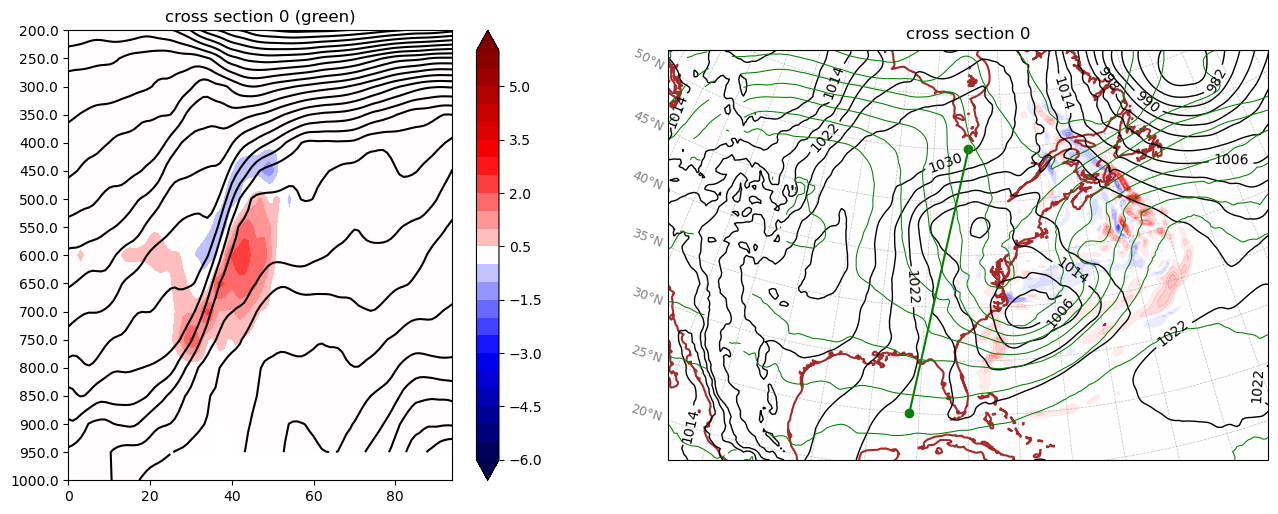

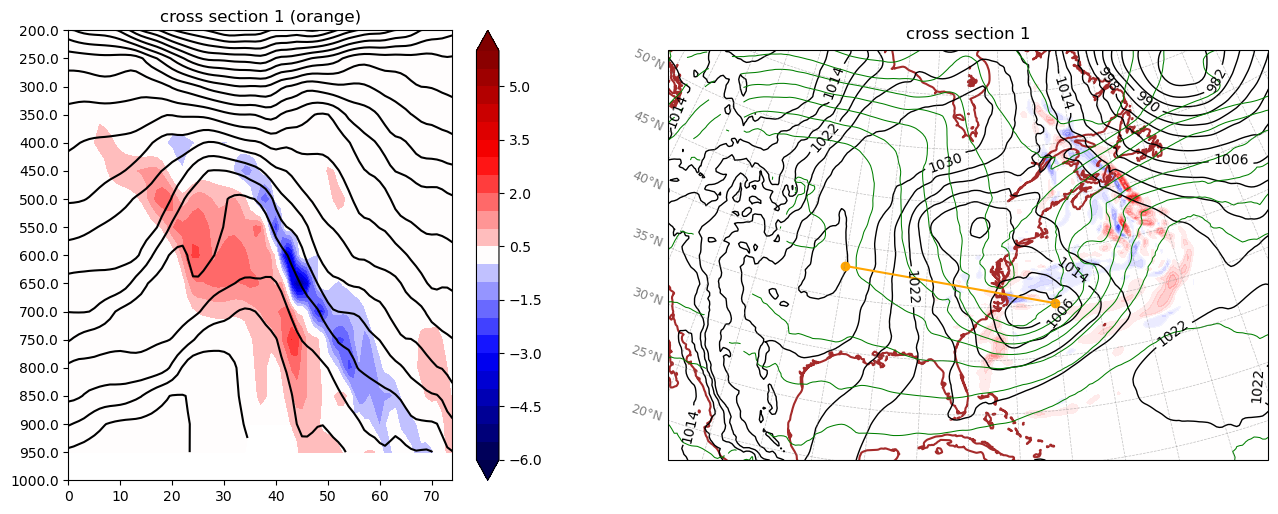

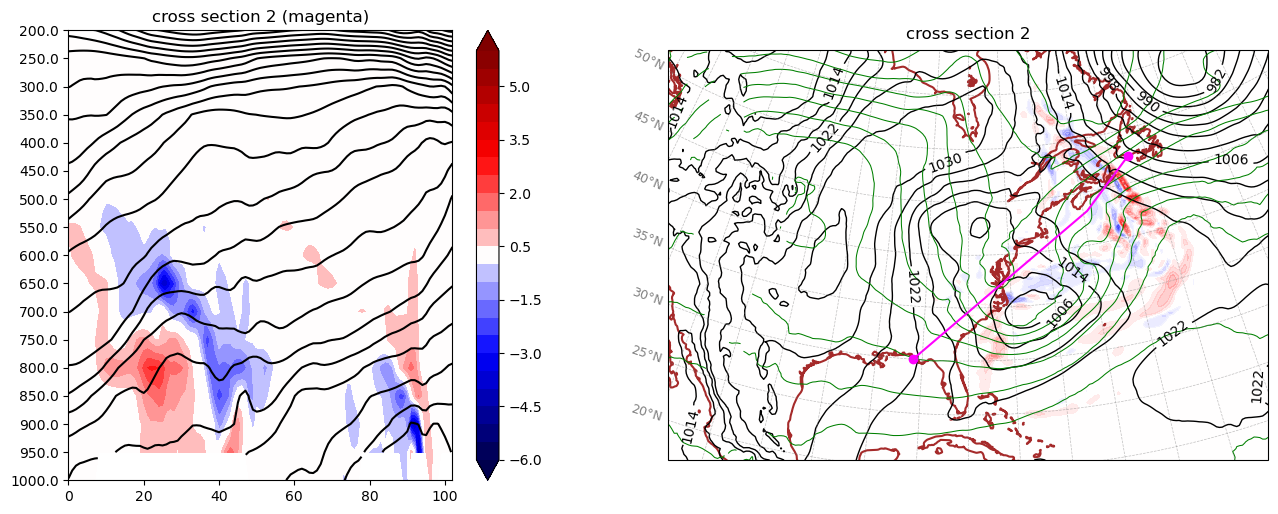

In [10]:
# cross-section using analysis_dependencies.cross_section_plot()
wrfHDL = unpHdlInit
latBegList = [ 25.0,  38.0,  30.0]
lonBegList = [-86.0, -95.0, -86.0]
latEndList = [ 50.0,  35.0,  47.5]
lonEndList = [-80.0, -70.0, -57.5]
xSectShadInterval = np.arange(-6., 6.1, 0.5)
xSectShadInterval = xSectShadInterval[np.where(xSectShadInterval != 0.)]
slpPertInterval = np.arange(-30., 30.1, 2.)
slpPertInterval = slpPertInterval[np.where(slpPertInterval != 0.)]
fig = cross_section_plot(wrfHDL=unpHdlInit,
                         latBegList=latBegList,
                         lonBegList=lonBegList,
                         latEndList=latEndList,
                         lonEndList=lonEndList,
                         xSectContVariable=get_wrf_th(unpHdlInit),
                         xSectContInterval=np.arange(250., 450.1, 4.),
                         xSectShadVariable=get_wrf_tk(ptdHdlInit)-get_wrf_tk(unpHdlInit),
                         xSectShadInterval=xSectShadInterval,
                         slp=get_wrf_slp(unpHdlInit),
                         slpInterval=np.arange(950., 1050.1, 4.),
                         thk=unpThk850_500Fcst,
                         thkInterval=np.arange(3700., 4500.1, 50.),
                         slpPert=get_wrf_slp(ptdHdlInit)-get_wrf_slp(unpHdlInit),
                         slpPertInterval=slpPertInterval,
                         datProj=datProj,
                         plotProj=plotProj,
                         presLevMin=20000.
                        )
plt.show(fig)